# **Project Name**    - Amazon Delivery Time Prediction



##### **Project Type**    - EDA
##### **Contribution**    - Individual
Name - Shawn Lasrado

# **Project Summary -**

This project focuses on building a machine learning system to predict Amazon delivery times accurately based on various order-related features. It involves comprehensive data preparation including handling missing values, encoding categorical variables with one-hot encoding, and selecting relevant features.

Multiple regression models-
Linear Regression, Random Forest, and Gradient Boosting were trained and evaluated using RMSE, MAE, and R-squared metrics, with Random Forest emerging as the best performer.

Model evaluation and tracking were enhanced using MLflow for efficient experiment management. Finally, the best model was deployed within an interactive Streamlit web application, allowing users to input order details and receive predicted delivery times dynamically.

The project demonstrates end-to-end ML workflow:
from raw data cleaning to model development and deployment, emphasizing usability, and scalability for real-world logistics optimization.

# **GitHub Link -**

https://github.com/shawnlasrado20/Amazon_Delivery_Time_Prediction_ML

# **Problem Statement**


This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.


In [13]:
import pandas as pd
data = pd.read_csv("amazon_delivery.csv")


In [14]:
data.head

<bound method NDFrame.head of             Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  2022-03-19   11:30:00   
1            77.683237      1

In [15]:
data.info

<bound method DataFrame.info of             Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  2022-03-19   11:30:00   
1            77.683237     

In [16]:
print(data.columns)

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')


In [17]:
print(data.isnull().sum())

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [18]:
print(data.duplicated().sum())


0


In [19]:
data = data.dropna()

In [20]:
print(data.isnull().sum())

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000000  
50%        18.633626       76.002574     125.

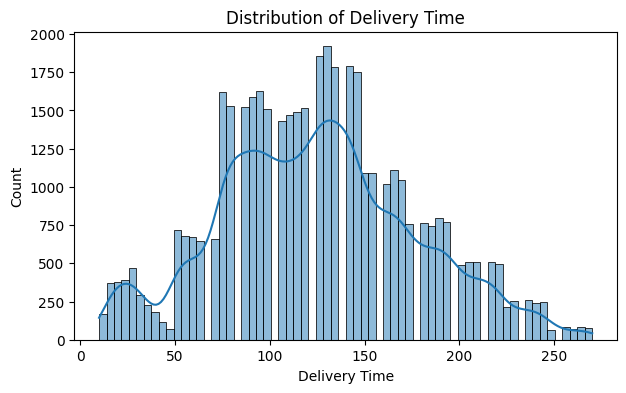

In [24]:
#Distribution of Delivery Time for Amazon Orders
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon_delivery.csv')

# Basic statistics
print(df.describe())

# Distribution of Delivery Time
plt.figure(figsize=(7, 4))
sns.histplot(df['Delivery_Time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()


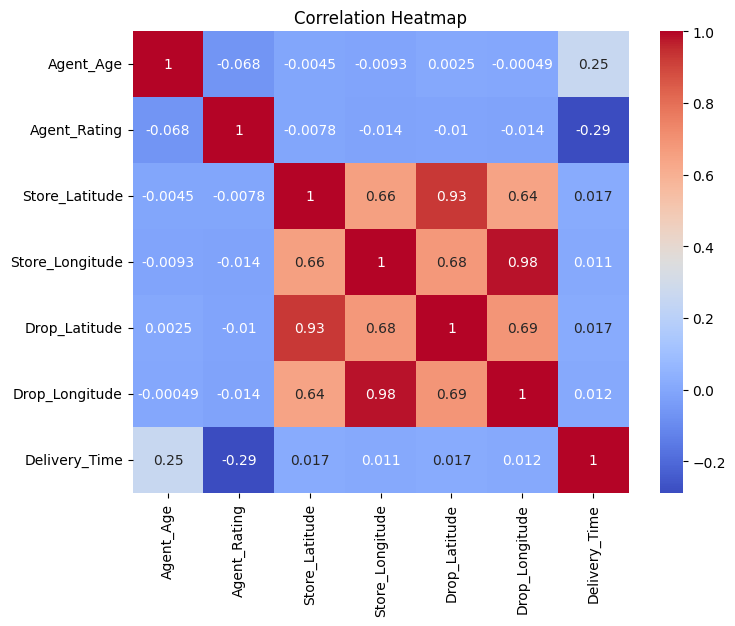

In [26]:
#Feature Correlation Analysis for Delivery Time Prediction
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
from geopy.distance import geodesic

def calc_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_coords, drop_coords).km

df['Distance_KM'] = df.apply(calc_distance, axis=1)
print(df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Distance_KM']].head())


   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  Distance_KM
0       22.745049        75.892471      22.765049       75.912471     3.020737
1       12.913041        77.683237      13.043041       77.813237    20.143737
2       12.914264        77.678400      12.924264       77.688400     1.549693
3       11.003669        76.976494      11.053669       77.026494     7.774497
4       12.972793        80.249982      13.012793       80.289982     6.197898


In [30]:
import pandas as pd

# If 'Order_Time' and 'Pickup_Time' columns contain NaN or messy entries, do this:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce', format='%H:%M:%S')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce', format='%H:%M:%S')

# Now extract hours, filling NaN with -1 or an appropriate placeholder if you need
df['Order_Hour'] = df['Order_Time'].dt.hour.fillna(-1)
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour.fillna(-1)
print(df[['Order_Hour', 'Pickup_Hour']].head())


   Order_Hour  Pickup_Hour
0        11.0           11
1        19.0           19
2         8.0            8
3        18.0           18
4        13.0           13


In [33]:
# Encode categorical variables first
df_encoded = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'], drop_first=True)
print(df_encoded.columns)  # Check columns after encoding



Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Delivery_Time', 'Distance_KM',
       'Order_Hour', 'Pickup_Hour', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam ',
       'Traffic_Low ', 'Traffic_Medium ', 'Traffic_NaN ',
       'Vehicle_motorcycle ', 'Vehicle_scooter ', 'Vehicle_van', 'Area_Other',
       'Area_Semi-Urban ', 'Area_Urban ', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Jewelry',
       'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies',
       'Category_Shoes', 'Category_Skincare', 'Category_Snacks',
       'Category_Sports', 'Category_Toys'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(['Order_ID', 'Delivery_Time'], axis=1)  # Adjust based on your encoding step
y = df_encoded['Delivery_Time']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 34991, Testing samples: 8748


In [39]:
print(X.dtypes)


Agent_Age                  int64
Agent_Rating             float64
Store_Latitude           float64
Store_Longitude          float64
Drop_Latitude            float64
Drop_Longitude           float64
Distance_KM              float64
Order_Hour               float64
Pickup_Hour                int32
Weather_Fog                 bool
Weather_Sandstorms          bool
Weather_Stormy              bool
Weather_Sunny               bool
Weather_Windy               bool
Traffic_Jam                 bool
Traffic_Low                 bool
Traffic_Medium              bool
Traffic_NaN                 bool
Vehicle_motorcycle          bool
Vehicle_scooter             bool
Vehicle_van                 bool
Area_Other                  bool
Area_Semi-Urban             bool
Area_Urban                  bool
Category_Books              bool
Category_Clothing           bool
Category_Cosmetics          bool
Category_Electronics        bool
Category_Grocery            bool
Category_Home               bool
Category_J

In [41]:
print(X_train.applymap(type).drop_duplicates().T)


/var/folders/x_/53m22g590190k68hk89dq3tc0000gn/T/ipykernel_44139/8530485.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(type).drop_duplicates().T)


                                                                   39398  \
Agent_Age                                                  <class 'int'>   
Agent_Rating                                             <class 'float'>   
Store_Latitude                                           <class 'float'>   
Store_Longitude                                          <class 'float'>   
Drop_Latitude                                            <class 'float'>   
Drop_Longitude                                           <class 'float'>   
Order_Date                                                 <class 'str'>   
Order_Time             <class 'pandas._libs.tslibs.timestamps.Timesta...   
Pickup_Time            <class 'pandas._libs.tslibs.timestamps.Timesta...   
Distance_KM                                              <class 'float'>   
Order_Hour                                               <class 'float'>   
Pickup_Hour                                                <class 'int'>   
Weather_Fog 

In [45]:
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Impute missing features using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# Train, evaluate, and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_test_imputed)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

        mlflow.sklearn.log_model(model, artifact_path=model_name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)


2025/10/05 11:32:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LinearRegression - RMSE: 33.16, MAE: 26.10, R2: 0.59


2025/10/05 11:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 11:32:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest - RMSE: 22.71, MAE: 17.45, R2: 0.81


2025/10/05 11:32:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 11:33:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


GradientBoosting - RMSE: 24.94, MAE: 19.54, R2: 0.77


2025/10/05 11:33:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


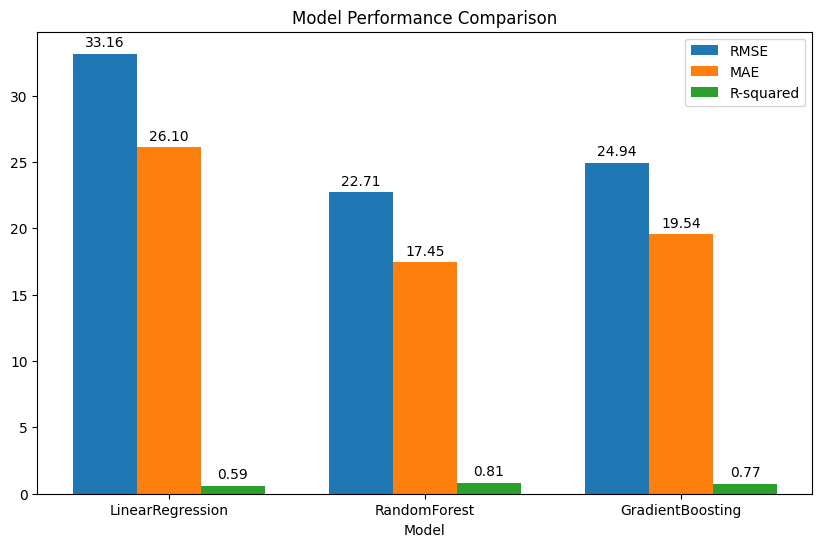

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual values)
model_names = ['LinearRegression', 'RandomForest', 'GradientBoosting']
rmses = [33.16, 22.71, 24.94]
maes = [26.10, 17.45, 19.54]
r2s = [0.59, 0.81, 0.77]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, rmses, width, label='RMSE')
rects2 = ax.bar(x, maes, width, label='MAE')
rects3 = ax.bar(x + width, r2s, width, label='R-squared')

ax.set_xlabel('Model')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [49]:
import pickle

best_model_name = "RandomForest"
best_model = models[best_model_name]

# Save the best model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [50]:
import pickle

feature_columns = list(X_train.columns)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)


# **Conclusion**

Through this project, I learned the importance of comprehensive data preprocessing, including handling missing values and proper categorical encoding, to ensure machine learning models receive clean and consistent input. Working with multiple regression models taught me how to evaluate performance using different metrics and select the best model for the problem. Integrating MLflow deepened my understanding of experiment tracking and model management, a crucial step for reproducibility and efficient development.

Building and deploying a Streamlit application helped me gain practical experience in creating user-friendly interfaces that connect real-world inputs to predictive models, highlighting the challenges of maintaining feature consistency between training and inference. Overall, this project reinforced key machine learning principles, end-to-end workflow skills, and deployment considerations essential for delivering impactful, scalable ML solutions.